# 01 - Classification simple

La classification consiste à prédire la *classe* (ou la catégorie) d'une observation.

Par exemple :

- Dire si un transaction de carte de crédit est frauduleuse ou non (Classes possibles : Oui/Non)
- Dire dans quelle langue un texte est (Classes : Français, Anglais, Espagnol, ...)
- Indiquer le contenu d'une image (Classes : Chat, Chien, Chèvre, Cheval, ...)

On va commencer avec un exemple simple avant d'appliquer ça à quelque chose de plus compliqué :

- **Dire si une plante iris est de l'espèce *setosa*, *versicolor* ou *virginica***


## Un programme qui reconnaît des fleurs

J'ai trouvé deux nouvelles plantes iris, et j'aimerais savoir à quelle espèce elle appartient...

Voici les mesures que j'ai prises :

**Plante 1**

- `sepal_length` = 5.0cm
- `sepal_width` = 3.8cm
- `petal_length` = 1.6cm
- `petal_width` = 0.3cm

**Plante 2**

- `sepal_length` = 5.45cm
- `sepal_width` = 2.8cm
- `petal_length` = 4.5cm
- `petal_width` = 1.7cm


Essayons de deviner les espèces

In [ ]:
#@title Importations
import pandas as pd
import numpy as np
import plotly.express as px

In [ ]:
#@title Lecture du dataframe

# Jeu de données un peu plus simple, on ne referra pas les étapes de supprimer les lignes vides/colonnes inutiles
iris = pd.read_csv("https://raw.githubusercontent.com/316k/misc-data/master/iris.csv")
display(iris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Jouer avec les données

On va se donner une intuition de ce qui se passe en jouant avec les données.


**QUESTION**

Pour ma première plante, j'ai `petal_width=0.3cm`.

Avec cette information seulement, pouvez-vous deviner l'espèce parmi *setosa*, *versicolor* et *virginica*?

Trouvez une façon de déterminer ça en affichant le tableau des données, ou encore avec un graphique

In [ ]:
#@title Exercice 1.1

# Option 1: On trie par petal_width et on clique sur le bouton pour se promener dans le tableau
display(iris[['petal_width', 'species']].sort_values('petal_width'))

# Option 2: Nuage de points: petal_width vs espèce
px.scatter(iris, x='petal_width', y='species')

,petal_width,species
12,0.1,setosa
13,0.1,setosa
9,0.1,setosa
32,0.1,setosa
37,0.1,setosa
...,...,...
136,2.4,virginica
114,2.4,virginica
109,2.5,virginica
100,2.5,virginica


**RÉPONSE**

Ça serait clairement une iris de l'espèce *setosa*

**QUESTION**

Pour ma deuxième plante, j'ai plutôt : `petal_width=1.7cm`. Seulement en regardant cette information, arrivez-vous à dire quelle serait l'espèce?

Pour répondre à cette question, filtrez le dataframe et affichez uniquement les lignes où `petal_width` est exactement de 1.7cm

In [ ]:
#@title Exercice 1.2
iris[iris.petal_width == 1.7]

,sepal_length,sepal_width,petal_length,petal_width,species
77,6.7,3.0,5.0,1.7,versicolor
106,4.9,2.5,4.5,1.7,virginica


**RÉPONSE**

Dans les données qu'on a, ça pourrait soit être une *versicolor*, soit une *virginica*

**QUESTION**

Si on considère plutôt `sepal_length=5.45cm` seulement, peut-on déterminer la sorte de plante?

Pour répondre, affichez les espèces des plantes dont le `sepal_length` est >= à 5.4cm et <=5.5cm

In [ ]:
#@title Exercice 1.3
iris[np.logical_and(iris.sepal_length >= 5.4, iris.sepal_length <= 5.5)].species

,species
5,setosa
10,setosa
16,setosa
20,setosa
31,setosa
33,setosa
36,setosa
53,versicolor
80,versicolor
81,versicolor


**RÉPONSE**

Si on a que cette information, ça serait soit une *setosa*, soit une *versicolor*

## Utiliser plusieurs caractéristiques en même temps

**QUESTION**

Réfléchissez aux deux dernières réponses. Si on combine l'information des deux, donc si on regardait à la fois :

- `petal_width=1.7cm`
- `sepal_length=5.45cm`

Quelle serait l'espèce?

**RÉPONSE**

- `petal_width=1.7cm` donnait soit *versicolor*, soit *virginica*
- `sepal_length=5.45cm` donnait soit *setosa*, soit *versicolor*

Si on a les deux en même temps, ça devrait être une *versicolor*


## Généraliser ça : quelle plante *ressemble le plus* à ma nouvelle plante?

Ce qu'on a fait jusqu'ici est : regarder, une caractéristique à la fois, quelles autres plantes connues ressemblaient le plus à notre nouvelle plante.

On devrait pouvoir faire ça sur les 4 caractéristiques en même temps.

&nbsp;

On peut considérer les caractéristiques d'une plante comme un *vecteur* à 4 dimensions :

$$\vec{\text{plante}} = (\text{sepal_length}, \text{sepal_width},\text{petal_length},\text{petal_width})$$

$$\vec{\text{plante}} = (5.45, 2.8, 4.5, 1.7)$$

On peut alors utiliser la notion de **distance entre deux vecteurs** et trouver l'autre plante la plus proche.

La distance euclidienne (ie, la formule de pythagore) peut être généralisée pour plusieurs dimensions :

$$\text{distance}(\vec{x}, \vec{y}) = \sqrt{(x_\text{sepal_length} - y_\text{sepal_length})^2 + \\ (x_\text{sepal_width} - y_\text{sepal_width})^2 + \\ (x_\text{petal_length} - y_\text{petal_length})^2 + \\(x_\text{petal_width} - y_\text{petal_width})^2}$$

**QUESTION**

Codez la fonction `distance_plantes(p1, p2)` qui prend en paramètres deux plantes et qui retourne la distance selon la formule ci-haut.

In [ ]:
#@title Exercice 1.4
# Méthode fournie pour créer une nouvelle ligne qui correspond à une plante
def creer_plante(sepal_length,sepal_width,petal_length,petal_width):
  return pd.Series(
      [sepal_length,sepal_width,petal_length,petal_width],
      index=['sepal_length','sepal_width','petal_length','petal_width']
  )

plante1 = iris.drop('species', axis='columns').loc[0] # 1ère plante du jeu de données
plante2 = creer_plante(5.45, 2.8, 4.5, 1.7) # Nouvelle plante
display(plante1)
display(plante2)

def distance_plantes(p1, p2):
  ...

######

def distance_plantes(p1, p2):
  return np.sqrt(
      (p1.sepal_length - p2.sepal_length)**2 +
      (p1.sepal_width - p2.sepal_width)**2 +
      (p1.petal_length - p2.petal_length)**2 +
      (p1.petal_width - p2.petal_width)**2)


#### tests
print("====")
print("Distance entre les deux plantes", distance_plantes(plante1, plante2))

,0
sepal_length,5.1
sepal_width,3.5
petal_length,1.4
petal_width,0.2


,0
sepal_length,5.45
sepal_width,2.80
petal_length,4.50
petal_width,1.70


====
Distance entre les deux plantes 3.531642677282061


**QUESTION**

Codez une fonction qui **crée un nouveau `DataFrame` basé sur une nouvelle plante à trouver**.

Votre méthode `ajouter_distance(df, nouvelle_plante)` doit retourner un nouveau `DataFrame` contenant la même chose que `df`, mais en ajoutant la nouvelle caractéristique `distance`, qui doit correspondre à la distance entre la plante et la `nouvelle_plante` fournie.

Réutilisez votre méthode `distance_plante()` codée au dernier numéro.

Le résultat devrait avoir l'air de :

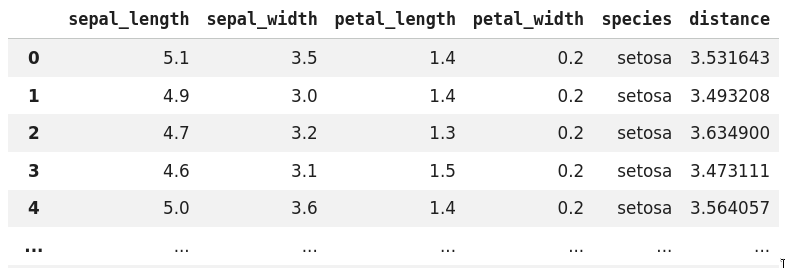

In [ ]:
#@title Exercice 1.5
def ajouter_distance(df, nouvelle_plante):
  ...

#####

def ajouter_distance(df, nouvelle_plante):
  distance_a_nouvelle_plante = []

  for idx, plante in df.iterrows():
    distance_a_nouvelle_plante.append(distance_plantes(plante, nouvelle_plante))

  return df.assign(distance=distance_a_nouvelle_plante)

#### tests
nouvelle_plante = creer_plante(5.45, 2.8, 4.5, 1.7)
df_iris_avec_distance = ajouter_distance(iris, nouvelle_plante)
display(df_iris_avec_distance)

,sepal_length,sepal_width,petal_length,petal_width,species,distance
0,5.1,3.5,1.4,0.2,setosa,3.531643
1,4.9,3.0,1.4,0.2,setosa,3.493208
2,4.7,3.2,1.3,0.2,setosa,3.634900
3,4.6,3.1,1.5,0.2,setosa,3.473111
4,5.0,3.6,1.4,0.2,setosa,3.564057
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.566046
146,6.3,2.5,5.0,1.9,virginica,1.050000
147,6.5,3.0,5.2,2.0,virginica,1.312440
148,6.2,3.4,5.4,2.3,virginica,1.446548


**QUESTION**

On a maintenant une façon de trouver la plante *la plus similaire*, en considérant les 4 caractéristiques en même temps.

La plante **la** plus similaire serait celle dont la distance est la plus petite.

Utilisez le `DataFrame` construit au dernier numéro pour trouver la ligne la plus proche de notre nouvelle plante $(5.45,2.8,4.5,1.7)$

In [ ]:
#@title Exercice 1.6
nouvelle_plante = creer_plante(5.45, 2.8, 4.5, 1.7)
df_iris_avec_distance = ajouter_distance(iris, nouvelle_plante)

##########
# La plante #84 est celle qui ressemble le plus à notre nouvelle plante
df_iris_avec_distance.sort_values('distance').iloc[0]

,84
sepal_length,5.4
sepal_width,3.0
petal_length,4.5
petal_width,1.5
species,versicolor
distance,0.287228


On va mettre tout ça ensemble : complétez le code suivant pour avoir une fonction qui détecte la sorte de fleur pour une nouvelle observation

In [ ]:
#@title Exercice 1.7
def detecter_nouvelle_plante(dataframe, sepal_length, sepal_width, petal_length, petal_width):
  # Utilisez le dataframe iris
  nouvelle_plante = creer_plante(sepal_length, sepal_width, petal_length, petal_width)
  ...

######

def detecter_nouvelle_plante(dataframe, sepal_length, sepal_width, petal_length, petal_width):
  nouvelle_plante = creer_plante(sepal_length, sepal_width, petal_length, petal_width)
  df_iris_avec_distance = ajouter_distance(dataframe, nouvelle_plante)
  plante_la_plus_proche = df_iris_avec_distance.sort_values('distance').iloc[0]
  return plante_la_plus_proche.species

#### tests
reponse1 = detecter_nouvelle_plante(iris, 5.45, 2.8, 4.5, 1.7)
print(reponse1)
reponse2 = detecter_nouvelle_plante(iris, 5.8,4.1,1.15,0.15)
print(reponse2)
# assert reponse1 == 'versicolor'
# assert reponse2 == 'setosa'

versicolor
setosa


## Premiers pas en *apprentissage machine*

Ce qu'on vient de réaliser dans les derniers exercices est un détecteur de plantes, **sans avoir à comprendre nous-mêmes la botanique**.

Plutôt, **on se fie aux exemples**.

&nbsp;

Si on modifie les exemples, la même logique peut détecter autre chose :

- Si ça avait été des tailles en cm pour des espèces de patates, on aurait pu faire la même chose
- Si ça avait été des longueurs/largeurs de chats vs des longueurs/largeurs de chiens, notre démarche serait restée la même.

&nbsp;

On se rapproche doucement de ce qui caractérise l'apprentissage machine : on a un algorithme général, et le résultat est entièrement déterminé par les **données** qu'on possède.


# Algorithme KNN

L'algorithme que vous venez de coder est un cas spécial de l'algorithme **KNN** : les **K-Nearest Neighbors**, ou **K plus proches voisins**.

On peut le voir comme un algorithme d'apprentissage **supervisé**. On doit donc avoir des données **étiquettées**, ie, dont on connaît la classe à prédire. Dans notre cas, on avait bien des exemples de plantes dont on connaissait l'espèce.

&nbsp;

Dans les exercices plus haut, on a seulement considéré **la** plante la plus similaire (K = 1 plus proche voisin). Cette méthode a le défaut d'être très sensible aux valeurs anormales. Inspectons ça :

**QUESTION**

J'ai une nouvelle plante avec comme mesures :

**Plante 3**

- `sepal_length=6.25`
- `sepal_width=2.7`
- `petal_length=4.95`
- `petal_width=1.4`

Selon la fonction que vous avez codée plus haut, quelle est son espèce?

In [ ]:
#@title Exercice 1.8
detecter_nouvelle_plante(iris, 6.25, 2.7, 4.95, 1.4)

'virginica'

**QUESTION**

Regardez plutôt les **5 plantes les plus proches** de cette nouvelle plante, et dites ce qui ne va pas

In [ ]:
#@title Exercice 1.9
nouvelle_plante = creer_plante(sepal_length=6.25, sepal_width=2.7, petal_length=4.95, petal_width=1.4)
ajouter_distance(iris, nouvelle_plante).sort_values('distance').iloc[0:5]

,sepal_length,sepal_width,petal_length,petal_width,species,distance
133,6.3,2.8,5.1,1.5,virginica,0.212132
72,6.3,2.5,4.9,1.5,versicolor,0.234521
83,6.0,2.7,5.1,1.6,versicolor,0.353553
63,6.1,2.9,4.7,1.4,versicolor,0.353553
73,6.1,2.8,4.7,1.2,versicolor,0.367423


**RÉPONSE**

Parmi les 5 plantes les plus similaires, **la** plante la plus similaire est une `virginica`, mais les 4 autres sont toutes des `versicolor`.

On a probablement plus une `versicolor`, malgré ce que la fonction nous disait

## Vote majoritaire

Plutôt que de toujours retourner **la** classe la plus proche, on peut utiliser un *vote majoritaire*.

On va plutôt regarder quelle espèce revient le plus souvent parmi les **K** observations les plus proches :

```python
['versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa']
=> Le vote est en faveur de 'versicolor'
```

Codez une fonction qui prend en paramètre un extrait de la colonne `species` (quelques lignes seulement) et qui retourne la valeur qui revient le plus souvent.

In [ ]:
#@title Exercice 1.10

def vote_majoritaire(choix):
  ...

###########

def vote_majoritaire(choix):
  # value_counts() retourne une Series avec le nombre de valeurs
  valeurs = choix.value_counts()
  valeurs = valeurs.sort_values()
  return valeurs.index[-1]

######## tests

exemple_especes1 = iris.loc[47:51].species
display(exemple_especes1)
print(vote_majoritaire(exemple_especes1)) # Ici, on devrait dire "setosa"

exemple_especes2 = iris.loc[99:103].species
display(exemple_especes2)
print(vote_majoritaire(exemple_especes2)) # Ici, on devrait dire "virginica"

,species
47,setosa
48,setosa
49,setosa
50,versicolor
51,versicolor


setosa


,species
99,versicolor
100,virginica
101,virginica
102,virginica
103,virginica


virginica


**QUESTION**

Écrivez une nouvelle fonction `detecter_nouvelle_plante_v2` qui rajoute un paramètre `K`, pour décider combien de plantes proches devraient "voter" pour décider de la sorte de plante


In [ ]:
#@title Exercice 1.11

def detecter_nouvelle_plante_v2(dataframe, sepal_length, sepal_width, petal_length, petal_width, K):
  nouvelle_plante = creer_plante(sepal_length, sepal_width, petal_length, petal_width)
  ...

#######
# Solution
def detecter_nouvelle_plante_v2(dataframe, sepal_length, sepal_width, petal_length, petal_width, K):
  nouvelle_plante = creer_plante(sepal_length, sepal_width, petal_length, petal_width)
  df_iris_avec_distance = ajouter_distance(dataframe, nouvelle_plante)
  df_iris_avec_distance = df_iris_avec_distance.sort_values('distance')
  df_iris_avec_distance = df_iris_avec_distance.iloc[0:K]
  return vote_majoritaire(df_iris_avec_distance.species)

#### tests
print("K=1:", detecter_nouvelle_plante_v2(iris, 6.25, 2.7, 4.95, 1.4, 1))
print("K=3:", detecter_nouvelle_plante_v2(iris, 6.25, 2.7, 4.95, 1.4, 3))
print("K=5:", detecter_nouvelle_plante_v2(iris, 6.25, 2.7, 4.95, 1.4, 5))
print("K=10:", detecter_nouvelle_plante_v2(iris, 6.25, 2.7, 4.95, 1.4, 10))

K=1: virginica
K=3: versicolor
K=5: versicolor
K=10: versicolor



## Évaluation

On a une méthode pour deviner l'espèce d'une plante, mais est-ce qu'elle marche bien?

&nbsp;

L'**évaluation** est une étape clé en apprentissage machine.

On va utiliser nos données pour estimer la qualité de notre fonction `detecter_nouvelle_plante_v2`.

&nbsp;

On va **séparer nos données en deux `DataFrame`s**. On va avoir :

- 2/3 des données pour exécuter notre algorithme KNN
- 1/3 restant comme données de contrôle : on va utiliser ces données pour tester la qualité de notre algorithme

&nbsp;

En apprentissage machine, la terminologie est :

- **Les données d'entraînement** : la partie de nos données qu'on utilise dans l'algorithme lui-même
- **Les données de test** : une partie des données qu'on garde de côté

&nbsp;

On va commencer par mesurer **l'exactitude** (en anglais: **accuracy**) de notre algorithme KNN : quand on lui donne nos données de test, quelle proportion est correctement catégorisée?

**QUESTION**

Commencez par séparer les données en deux `DataFrame`s :

- `iris_entrainement`: doit contenir le premier 2/3 des observations mélangées
- `iris_test`: doit le dernier 1/3 des observations

In [ ]:
#@title Exercice 1.12

# Cette ligne permet d'obtenir un DataFrame avec les lignes mélangées au hasard
# La valeur `random_state` permet de forcer un certain "hasard" prédéterminé, qui
# sera toujours le même
iris_melange = iris.sample(frac=1, random_state=55)
display(iris_melange)

########

nb_total = len(iris_melange)
deux_tiers = int(2/3*nb_total)
iris_entrainement = iris_melange.iloc[0:deux_tiers]
iris_test = iris_melange.iloc[deux_tiers:]

display(iris_entrainement)
display(iris_test)

,sepal_length,sepal_width,petal_length,petal_width,species
9,4.9,3.1,1.5,0.1,setosa
36,5.5,3.5,1.3,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
137,6.4,3.1,5.5,1.8,virginica
136,6.3,3.4,5.6,2.4,virginica
...,...,...,...,...,...
37,4.9,3.6,1.4,0.1,setosa
55,5.7,2.8,4.5,1.3,versicolor
29,4.7,3.2,1.6,0.2,setosa
125,7.2,3.2,6.0,1.8,virginica


,sepal_length,sepal_width,petal_length,petal_width,species
9,4.9,3.1,1.5,0.1,setosa
36,5.5,3.5,1.3,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
137,6.4,3.1,5.5,1.8,virginica
136,6.3,3.4,5.6,2.4,virginica
...,...,...,...,...,...
42,4.4,3.2,1.3,0.2,setosa
56,6.3,3.3,4.7,1.6,versicolor
99,5.7,2.8,4.1,1.3,versicolor
134,6.1,2.6,5.6,1.4,virginica


,sepal_length,sepal_width,petal_length,petal_width,species
27,5.2,3.5,1.5,0.2,setosa
146,6.3,2.5,5.0,1.9,virginica
80,5.5,2.4,3.8,1.1,versicolor
18,5.7,3.8,1.7,0.3,setosa
24,4.8,3.4,1.9,0.2,setosa
45,4.8,3.0,1.4,0.3,setosa
33,5.5,4.2,1.4,0.2,setosa
139,6.9,3.1,5.4,2.1,virginica
58,6.6,2.9,4.6,1.3,versicolor
119,6.0,2.2,5.0,1.5,virginica


**QUESTION**

L'**exactitude** est le pourcentage de bonnes réponses que votre fonction arrive à donner.

Calculez ce chiffre en appelant `detecter_nouvelle_plante_v2(iris_entrainement, ...)` avec chaque plante contenue dans `iris_test`.

Comparez la prédiction faite par votre KNN avec avec la vraie réponse.

Affichez :

- Le nombre total de bonnes réponses
- Le pourcentage correspondant (divisez le nombre de bonnes réponses par le nombre de tests faits)

**Utilisez `K=3`.**

In [ ]:
#@title Exercice 1.13
nb_bonnes_reponses = 0

for idx, plante in iris_test.iterrows():
  vraie_reponse = plante.species
  prediction = detecter_nouvelle_plante_v2(iris_entrainement, plante.sepal_length, plante.sepal_width, plante.petal_length, plante.petal_width, 3)
  if prediction == vraie_reponse:
    nb_bonnes_reponses += 1

print("Nombre de bonnes réponses:", nb_bonnes_reponses)
print("Pourcentage de bonnes réponses:", nb_bonnes_reponses / len(iris_test) * 100)

Nombre de bonnes réponses: 47
Pourcentage de bonnes réponses: 94.0


**QUESTION**

Est-ce que ce nombre change si vous utilisez d'autres valeurs de `K`?

Testez :

- `K=1`
- `K=5`
- `K=10`
- `K=20`
- `K=80`

Utilisez une boucle pour éviter de recopier 5 fois le même code

In [ ]:
#@title Exercice 1.14
valeurs_de_k = [1, 5, 10, 20, 80]
#######

for k in valeurs_de_k:
  nb_bonnes_reponses = 0

  for idx, plante in iris_test.iterrows():
    vraie_reponse = plante.species
    prediction = detecter_nouvelle_plante_v2(iris_entrainement, plante.sepal_length, plante.sepal_width, plante.petal_length, plante.petal_width, k)
    if prediction == vraie_reponse:
      nb_bonnes_reponses += 1

  print("K =", k)
  print("Nombre de bonnes réponses:", nb_bonnes_reponses)
  print("Pourcentage de bonnes réponses:", nb_bonnes_reponses / len(iris_test) * 100)

K = 1
Nombre de bonnes réponses: 47
Pourcentage de bonnes réponses: 94.0
K = 5
Nombre de bonnes réponses: 49
Pourcentage de bonnes réponses: 98.0
K = 10
Nombre de bonnes réponses: 49
Pourcentage de bonnes réponses: 98.0
K = 20
Nombre de bonnes réponses: 47
Pourcentage de bonnes réponses: 94.0
K = 80
Nombre de bonnes réponses: 35
Pourcentage de bonnes réponses: 70.0


**QUESTION DE RÉFLEXION**

Si on utilisait `K=` la taille du dataframe `iris_entrainement` au complet, qu'est-ce qui se passerait?

In [ ]:
#@title Exercice 1.15
### Vous pouvez écrire du code ici au besoin pour vous aider dans votre réflexion

# On peut jeter un oeil aux espèces présentes dans iris_entrainement
display(iris_entrainement.species.value_counts())

# Le résultat sera toujours le même peu importe la plante qu'on regarde
print(detecter_nouvelle_plante_v2(iris_entrainement, 0, 0, 0, 0,
                                  len(iris_entrainement)))

print(detecter_nouvelle_plante_v2(iris_entrainement, 999, 999, 999, 999,
                                  len(iris_entrainement)))


,count
species,
virginica,35
setosa,34
versicolor,31


virginica
virginica


**RÉPONSE**

Si on fait toujours un vote majoritaire parmi *toutes* les plantes connues, c'est simplement la sorte de plante la plus commune qui va gagner peu importe les caractéristiques de la plante qu'on regarde.

Avec les données de `iris_entrainement`, il y a légèrement plus de *virginica* que des autres plantes, donc à K=100, on va toujours répondre ça

**QUESTION DE RÉFLEXION**

On a utilisé deux `DataFrame`s plutôt qu'un seul quand venait le temps de faire l'évaluation :

> On va **séparer nos données en deux `DataFrame`s**. On va avoir :
>
> - 2/3 des données pour exécuter notre algorithme KNN
> - 1/3 restant comme données de contrôle : on va utiliser ces données pour tester la qualité de notre algorithme

Pourquoi est-ce nécessaire?

Pourquoi ne peut-on pas simplement utiliser toutes les données dans le KNN, et toutes les données pour tester le KNN?

**RÉPONSE**

Pour évaluer notre algorithme, on a besoin de nouvelles valeurs qui ne font pas partie des exemples connus par le KNN.

Exemple extrême : si on utilisait K=1. Si on prenait les 150 plantes dans notre KNN, et qu'on cherchait chacune de ces 150 plantes dans le KNN, chaque plante testée serait la plus proche d'elle-même, et on aurait toujours la bonne réponse.

Ça ne ferait pas de sens, on aurait la fausse impression que notre exactitude est de 100%. On ne saurait pas si notre algorithme sera bon ou mauvais au moment de tester avec des nouvelles plantes inconnues.

# 02 - Utilisation de `sklearn`

**`scikit-learn`** est une bibliothèque de fonctions qui regroupe un paquet d'outils pour l'apprentissage machine.

Elle offre entre autres plusieurs algorithmes communs prêts à être utilisés, dans la mesure où on a un jeu de données préparé avec Numpy ou Pandas.

&nbsp;

Elle offre entres autres une implantation de l'algorithme KNN prête à être utilisée, nommée `KNeighborsClassifier`.

On va voir comment s'en servir pour appliquer cet algo à n'importe quel nouveau problème.

Les différents algorithmes disponibles dans `sklearn` doivent typiquement être importés séparément. Voici comment importer l'implantation de KNN disponible :

In [ ]:
#@title Importation
from sklearn.neighbors import KNeighborsClassifier

Tous les algorithmes qu'on va voir utilisent une interface similaire :

1. Créer un *modèle*
2. *Entraîner* le modèle avec `fit(X, y)`
3. Utiliser le modèle pour *prédire* des valeurs avec `predict()`, entres autres pour évaluer le résultat

Étape par étape :

1. **Créer un modèle**

In [ ]:
# 1. Créer un modèle
modele = KNeighborsClassifier(5) # KNN, avec K=5 choisi

2. **Entraînement**

C'est l'étape à laquelle le modèle reçoit des exemples de données sur lesquels baser ses prochaines prédictions.

La terminologie utilisée par `sklearn` est :

- `X` (x majuscule) : les exemples de données utilisés pour décider du résultat. Ici, ça serait un `DataFrame` qui contient les 4 caractéristiques dont on se sert pour deviner la classe : `sepal_length`, `sepal_width`, `petal_length`, `petal_width`
- `y` (y minuscule) : les exemples de ce qu'on souhaite prédire. Ici, ça serait la colonne du `DataFrame` qui correspond aux réponses : `species` seulement

Dans le cas de l'algorithme KNN, cet "entraînement" revient à "sauvegarder les données quelque part pour pouvoir les consulter plus tard", mais on verra des "entraînements" plus complexes dans les prochains chapitres.

In [ ]:
# X = tableau 2D (plusieurs colonnes), chaque ligne est l'ensemble des caractéristiques utilisées pour prédire la classe
X_entrainement = iris_entrainement[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
# y = tableau 1D (une seule colonne), chaque valeur est la classe attendue
y_entrainement = iris_entrainement['species']
modele.fit(X_entrainement, y_entrainement)

KNeighborsClassifier()

**3. Utilisation du modèle et évaluation**

Au moment d'utiliser le modèle, on devrait seulement lui donner des `X` (x majuscule, les caractéristiques qu'on connaît), et le modèle nous répond avec des nouveaux `y` prédits.

In [ ]:
# On sépare nos données de test en X/y
X_test = iris_test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y_test = iris_test['species']

# Le résultat est un tableau Numpy avec les réponses données par le modèle
y_predictions = modele.predict(X_test)

display(y_predictions)

array(['setosa', 'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'setosa', 'virginica', 'versicolor', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'virginica', 'setosa'], dtype=object)

Pour **l'évaluation** de la qualité des prédictions, on pourrait simplement comparer les prédictions `y_predictions` avec les valeurs connues :

In [ ]:
# Series qui contient des True/False pour dire si la prédiction est bonne ou pas
cases_egales = (y_test == y_predictions)

display(cases_egales.iloc[:5]) # On affiche les 5 premiers pour voir

nb_vrais = cases_egales.sum() # Somme de valeurs True/False => nombre de cases à True
proportion_vrais = nb_vrais / len(y_test)
print("Nombre de bonnes réponses", nb_vrais)
print("Proportion de bonnes réponses", proportion_vrais)

,species
27,True
146,True
80,True
18,True
24,True


Nombre de bonnes réponses 49
Proportion de bonnes réponses 0.98


`sklearn` propose une fonction qui calcule tout ça et qui donne la proportion directement :

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predictions)) # 98% de précision, super!

0.98


## Exercice: Tester l'algorithme KNN sur un autre jeu de données

Avec `sklearn`, on peut utiliser l'algorithme KNN très rapidement sur un jeu de données!

On change le `DataFrame` utilisé, et boum! C'est réglé.

&nbsp;

**Exercice** : Reprennons le jeu de données **MNIST**, pour les chiffres manuscrits.

Voici une autre façon de télécharger les petites images et les étiquettes, depuis le dépôt gratuit de jeux de données pour l'apprentissage machine **OpenML** :

In [ ]:
#@title Importation des images
from sklearn.datasets import fetch_openml

# Données chargées depuis ce jeu de données: https://www.openml.org/d/554
# On obtient deux tableaux numpy ici:
# - images, de shape (70_000, 728), pour 70 000 images qui contiennent toutes 728 pixels (28*28 = 728)
# - etiquettes, un vecteur 1D de 70 000 valeurs textuelles pour indiquer si c'est un "1", un "2", un "3", ...
images, etiquettes = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

# Le nombre d'images qu'on souhaite garder pour nos tests
# Vous pouvez augmenter ce nombre jusqu'au max (70 000 images)
# mais tout va prendre plus de temps si on utilise plus d'images
NB_IMAGES = 5_000

# Tableaux extraction du nombre d'images souhaité
images = images[:NB_IMAGES] / 255.0
etiquettes = etiquettes[:NB_IMAGES]

# Conversion en DataFrame avec pandas pour faciliter les analyses
df_images = pd.DataFrame(images).assign(etiquette=etiquettes)

**Rappel sur MNIST** : Chaque image est en réalité un petit carré 28px de large par 28px de haut.

Ici, les `images` sont déjà écrasées en une seule ligne de 728 valeurs.

Pour visualiser une image, on doit la **reshape** au format (28, 28)

In [ ]:
def imshow(matrice, titre="(Image sans titre)"):
  import matplotlib.pyplot as plt
  assert np.all(np.logical_and(matrice >= 0, matrice <= 1)), "Les pixels doivent avoir des valeurs de 0 à 1"
  plt.imshow(matrice, cmap="gray", vmin=0, vmax=1)
  plt.title(titre)
  plt.show()

def afficher_image_mnist(i):
  img = images[i]
  print("Étiquette:", etiquettes[i])
  imshow(img.reshape((28, 28)), f'Image #{i}')

from ipywidgets import interact

interact(afficher_image_mnist,
         i=(0, len(images)))

interactive(children=(IntSlider(value=2500, description='i', max=5000), Output()), _dom_classes=('widget-inter…

<function __main__.afficher_image_mnist(i)>

## Préparer les données

Les modèles fournis par sklearn travaillent avec des tableaux 2D.

Commencez par prendre le tableau des pixels et le tableau des étiquettes et mettez ça ensemble dans un seul gros DataFrame de pandas.

In [ ]:
#@title Exercice 2.1

### Transformez le tableau `images` en un DataFrame nommé `df_images`
df_images = pd.DataFrame(images)

### Ajoutez à ce DataFrame une colonne `étiquette` à ce DataFrame
df_images = df_images.assign(etiquette=etiquettes)

Affichez l'image moyenne de toutes les images dont l'étiquette est `"3"`

In [ ]:
#@title Exercice 2.2
### Utilisez px.imshow( ... )
px.imshow(df_images[df_images.etiquette == '3'].drop('etiquette', axis='columns').mean().to_numpy().reshape((28, 28)))

## Mélanger les données et en mettre de côté pour l'évaluation

Pour évaluer notre modèle, on aura besoin de mettre des données de côté.

Mélangez les lignes du DataFrame et séparez-le en deux autres DataFrames, un pour l'entraînement, un autre pour le test. Gardez seulement 25% des données pour le test.

Utilisez `random_state=1337`

In [ ]:
#@title Exercice 2.3
df_melange = df_images.sample(frac=1, random_state=1337)

trois_quarts = int(len(df_melange) * 3/4)
df_entrainement = df_melange.iloc[:trois_quarts]
df_test = df_melange.iloc[trois_quarts:]

display(df_entrainement)
display(df_test)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,etiquette
3226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
4969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,etiquette
2058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
3874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
2856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


## Apprendre un modèle qui classifie les images selon le chiffre contenu

Votre tâche : vous devez utiliser le `KNeighborsClassifier` de sklearn pour obtenir un modèle qui détecte des chiffres manuscrits.

Rappel des étapes :

1. Importez les classes nécessaires
2. Définissez votre modèle. Utilisez K=5.
3. Séparez vos données en X/y d'entraînement et de test
    - X doit être un DataFrame contenant dans chaque ligne les données fournies au modèle pour faire la prédiction. Ici, chaque ligne de X doit contenir 784 valeurs de pixels pour une image de chiffre dessiné.
    - y doit être un DataFrame contenant dans chaque ligne la réponse attendue. Ici, chaque ligne doit contenir le chiffre entre 0 et 9 qui a été dessiné
4. Entraînez le modèle avec les données d'entraînement
5. Faites faire des prédictions à votre modèle pour tous les X_test
6. Évaluez l'exactitude du modèle en comparant les prédictions avec les y_test

In [ ]:
#@title Exercice 2.4
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

modele = KNeighborsClassifier(5) # KNN, avec K=5 choisi

X_entrainement = df_entrainement.drop('etiquette', axis='columns')
y_entrainement = df_entrainement['etiquette']

X_test = df_test.drop('etiquette', axis='columns')
y_test = df_test['etiquette']

modele.fit(X_entrainement, y_entrainement)

y_predictions = modele.predict(X_test)

print("Exactitude:", accuracy_score(y_test, y_predictions))

Exactitude: 0.9264


Si tout s'est bien passé, vous devriez avoir entre **92% et 93%** d'exactitude.

# Entrainement final et utilisation

Pour avoir un estimé correct de l'erreur, on a eu besoin de mettre des données de côté (si on utilisait toutes nos données pendant la phase d'entraînement, on ne serait plus capables de faire une estimation acceptable de l'erreur).

En réalité, 92% d'erreur est une estimation un peu pessimiste : il est possible qu'on puisse améliorer les résultats lors des vraies utilisations si on utilise toutes les données qu'on possède dans notre KNN, plutôt que seulement une partie.

&nbsp;

La dernière étape sera donc d'entraîner le modèle une dernière fois, avec l'ensemble de toutes les données.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

modele_final = KNeighborsClassifier(5) # KNN, avec K=5 choisi

X_total = df_images.drop('etiquette', axis='columns')
y_total = df_images['etiquette']

modele_final.fit(X_total, y_total)

KNeighborsClassifier()

Une fois ce modèle final entraîné, on peut l'utiliser pour faire autant de prédictions dans un vrai contexte.

Voici un petit bout de code qui vous permet de dessiner un chiffre avec la souris et de regarder comment votre modèle le classifie.

(28, 28)
6 20 14 7
2 26 24 2


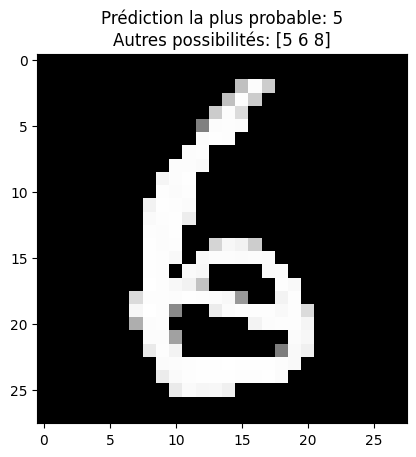

In [ ]:
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

def dessin(filename='drawing.png', w=504, h=504, line_width=1):
  """Adapté de : https://gist.github.com/korakot/8409b3feec20f159d8a50b0a811d3bca"""
  from IPython.display import clear_output
  import cv2
  import numpy as np
  canvas_html = """
  <canvas width=28 height=28 style="width: 504px; height: 504px; border: 1px solid black;"></canvas>
  <br>
  <button>Sauvegarder l'image</button>
  <script>
  var canvas = document.querySelector('canvas')
  var ctx = canvas.getContext('2d')
  ctx.lineWidth = %d
  ctx.strokeStyle = "white";
  ctx.fillStyle = "black";
  ctx.fillRect(0, 0, 28, 28);
  var button = document.querySelector('button')
  var mouse = {x: 0, y: 0}
  canvas.addEventListener('mousemove', function(e) {
    mouse.x = e.pageX - this.offsetLeft
    mouse.y = e.pageY - this.offsetTop
  })
  canvas.onmousedown = ()=>{
    ctx.beginPath()
    ctx.moveTo(mouse.x/18, mouse.y/18)
    canvas.addEventListener('mousemove', onPaint)
  }
  canvas.onmouseup = ()=>{
    canvas.removeEventListener('mousemove', onPaint)
  }
  var onPaint = ()=>{
    ctx.lineTo(mouse.x/18, mouse.y/18)
    ctx.stroke()
  }
  var data = new Promise(resolve=>{
    button.onclick = ()=>{
      resolve(canvas.toDataURL('image/png'))
    }
  })
  </script>
  """


  disp = display(HTML(canvas_html % (line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  clear_output()
  img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
  print(img.shape)
  img = cv2.resize(img, (28, 28))
  # Centrer les pixels
  colonnes = img.sum(axis=0)
  rangees = img.sum(axis=1)
  def get_offset(line):
    line = line.copy()
    line[line > 0] = 1
    first = np.argmax(line)
    last = len(line) - np.argmax(line[::-1])
    span = last - first
    balanced_spacing = (len(line) - span) // 2
    print(first, last, span, balanced_spacing)
    return balanced_spacing - first
  offset_x = get_offset(colonnes)
  offset_y = get_offset(rangees)
  # Centrer à partir de ça
  img = np.roll(img, offset_x, axis=1)
  img = np.roll(img, offset_y, axis=0)

  cv2.imwrite("drawing.png", img)

  return img

nouvelle_image = dessin() / 255.0
prediction = modele_final.predict([nouvelle_image.reshape(-1)])[0]
prediction_choix = modele_final.predict_proba([nouvelle_image.reshape(-1)])[0]
prediction_choix = np.arange(10)[prediction_choix > 0]

imshow(nouvelle_image, titre=f"Prédiction la plus probable: {prediction}\nAutres possibilités: {prediction_choix}")

Dernier petit détail : vous allez probablement remarquer que les résultats sont loins d'un vrai **92%**...

On peut probablement attribuer ça à **la différence entre les données (chiffres écrits à la main) et le nouveau contexte d'utilisation (chiffres écrits avec une souris sur un ordinateur)**.

&nbsp;

La qualité d'un modèle en apprentissage machine dépend beaucoup de la qualité des exemples d'entraînement... Si les exemples d'entraînement ont des différences importantes avec la réalité, on va avoir des surpises.

# 03 - Inspecter les erreurs

Quelles sont les images mal classées?

Créez un nouveau `DataFrame` nommé `df_inspection`, qui repart de `df_test` et qui ajoute résultat de `y_prediction` en tant que colonne supplémentaire nommée `prediction`.

&nbsp;

Utilisez ensuite `df_inspection` pour répondre aux questions suivantes :

a) Combien y a-t-il d'images mal classifiées dans `df_test`?

b) Est-ce que les erreurs sont bien réparties? Par exemple, est-ce qu'il y a autant d'erreurs sur des 5 que sur des 3, ou est-ce que le modèle a plus de misère avec un chiffre en particulier?

In [ ]:
#@title Exercice 3.1
### Créez le DataFrame df_inspection
df_inspection = df_test.assign(prediction=y_predictions)
display(df_inspection)

### a) Combien d'images mal classifiées? Utilisez df_inspection pour compter ça
df_mal_classifiees = df_inspection[df_inspection.etiquette != df_inspection.prediction]
print(len(df_mal_classifiees), "images mal classifiées")

### b) Visualisez la répartition des erreurs
### Vous pouvez par exemple regarder un diagramme circulaire qui montre les proportions
### de chaque chiffre mal classifié
value_counts = df_mal_classifiees.etiquette.value_counts()
display(px.pie(value_counts, names=value_counts.index, values=value_counts.values))

**RÉPONSE**

a) 92 images mal classifiées

b) Le modèle a plus de difficulté avec les 2 et les 8. Il a visiblement beaucoup de facilité avec les 1, qui n'ont aucune erreur de classification dans le test qu'on a fait

**QUESTION**

De quoi ont l'air les 3 mal classifiés?

Affichez toutes les images des 3 contenus dans `y_test` qui n'ont pas été reconnus correctement avec `imshow()`.

*Truc:* faites une boucle `for` avec `for index, ligne in votre_dataframe.iterrows():`


In [ ]:
#@title Exercice 3.2
df_mal_classifies = df_inspection[df_inspection.etiquette != df_inspection.prediction]

images = df_mal_classifies[df_mal_classifies.etiquette == "3"].drop(['etiquette', 'prediction'], axis='columns')

for idx, image in images.iterrows():
  imshow(image.to_numpy().reshape((28, 28)), "Image d'un 3 mal reconnu, index #" + str(idx))

**QUESTION**

Retournez voir votre code et notez la réponse aux deux questions suivantes :

- Quelle était l'exactitude du modèle à K=5?
- Combien de temps a pris l'exécution de la cellule qui faisait **l'entraînement et l'évaluation** de votre modèle?

Pour compter le temps passé à exécuter du code, inspirez-vous du code suivant. Vous devrez modifier la cellule de l'Exercice 2.4 (celle qui fait votre entraînement).

In [ ]:
#@title Exemple de code pour compter le temps passé à faire quelque chose
import time
avant = time.time()


# Petit test d'une fonction qui prend beaucoup de temps à exécuter
print("Calcul lent ici...")
from itertools import combinations
list(combinations(range(80), 5))[0]


apres = time.time()
print("Temps total:", apres - avant, "secondes")

**RÉPONSE**

Avec la configuration initiale (5000 images, K=5):

Initialement, on a 92.6% d'exactitude

Ça a pris environ 1s pour faire l'entraînement et l'évaluation, c'était très rapide

**QUESTION**

On va vérifier comment le nombre d'exemples impacte le temps requis et l'exactitude du modèle.

&nbsp;

Modifiez le nombre d'images `NB_IMAGES` dans la cellule de code qui importe MNIST.

Plutôt que de seulement utiliser 5 000 images, on va utiliser :

1. 35 000 images (la moitié des images)
2. 70 000 images (toutes les images disponibles dans les données originales)

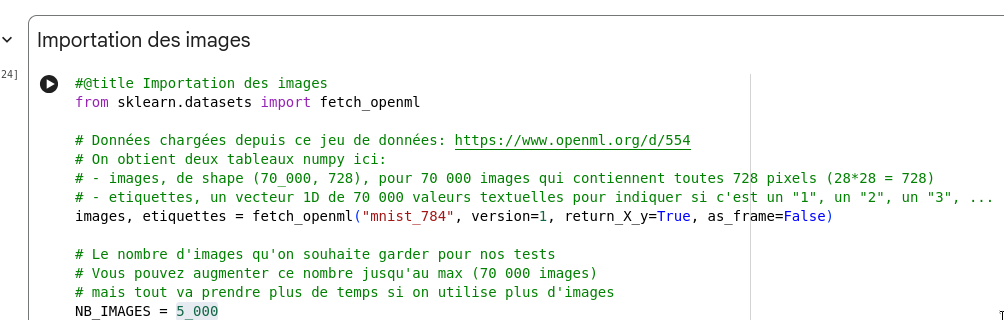

Modifiez cette cellule, puis ré-exécutez tout le code qui suit : re-séparez les données, ré-entraînez et ré-évaluez le modèle avec le nombre modifié.

Vous pouvez ré-exécuter plein de cellules rapidement dans l'ordre en faisant Shift+Enter, Shift+Enter, Shift+Enter, ...


Pour ces deux versions, comparez :

- Le temps d'exécution requis pour l'entraînement du modèle
- La nouvelle exactitude

**RÉPONSE**

(Le temps exact peut varier d'une fois à l'autre, mais ça donne une idée de l'ordre de grandeur à peu près)

Avec 35 000 images :

- Exactitude: 0.9664
- Temps total: 15.06495976448059 secondes

Avec 70 000 images :

- Exactitude: 0.9712571428571428
- Temps total: 61.248379707336426 secondes

**On remarque** : à beaucoup plus d'images, ça prend significativement plus de temps pour quelques pourcents gagnés en exactitude.